## Importation des données.

In [1]:
import pandas as pd
import numpy as np

path = 'data/jobrate.xlsx'

jobrate_df = pd.read_excel(path, sheet_name='JOBRATE')
jobrate_df.head()

/var/folders/fj/25hghm0n7n33b98vlpmy81dm0000gn/T/ipykernel_1235/3079144318.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Communication_Skills,Problem_Solving,Learning_Ability,Judgement_under_Pressure,Observational_Skills,Willingness_to_Confront_Problems,Interest_in_People,Interpersonal_Sensitivity,Desire_for_Self_Improvement,Appearance,Dependability,Physical_Ability,Integrity,Overall_Rating
0,2,6,8,3,8,8,5,3,8,7,9,8,6,7
1,7,4,7,5,8,8,7,6,8,5,7,6,6,7
2,5,6,7,5,7,8,6,3,7,7,5,8,7,5
3,6,7,8,6,9,7,7,7,9,8,8,9,9,7
4,9,9,9,9,7,7,9,8,8,7,8,8,8,8


In [2]:
jobrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Communication_Skills              103 non-null    int64
 1   Problem_Solving                   103 non-null    int64
 2   Learning_Ability                  103 non-null    int64
 3   Judgement_under_Pressure          103 non-null    int64
 4   Observational_Skills              103 non-null    int64
 5   Willingness_to_Confront_Problems  103 non-null    int64
 6   Interest_in_People                103 non-null    int64
 7   Interpersonal_Sensitivity         103 non-null    int64
 8   Desire_for_Self_Improvement       103 non-null    int64
 9   Appearance                        103 non-null    int64
 10  Dependability                     103 non-null    int64
 11  Physical_Ability                  103 non-null    int64
 12  Integrity                         10

## Extracting all the active vars in dataset

In [3]:
X = jobrate_df[jobrate_df.columns[:-1]]
X.head()

,Communication_Skills,Problem_Solving,Learning_Ability,Judgement_under_Pressure,Observational_Skills,Willingness_to_Confront_Problems,Interest_in_People,Interpersonal_Sensitivity,Desire_for_Self_Improvement,Appearance,Dependability,Physical_Ability,Integrity
0,2,6,8,3,8,8,5,3,8,7,9,8,6
1,7,4,7,5,8,8,7,6,8,5,7,6,6
2,5,6,7,5,7,8,6,3,7,7,5,8,7
3,6,7,8,6,9,7,7,7,9,8,8,9,9
4,9,9,9,9,7,7,9,8,8,7,8,8,8


## Correlation between all vars

In [4]:
correlation = X.corr()
correlation.head()


,Communication_Skills,Problem_Solving,Learning_Ability,Judgement_under_Pressure,Observational_Skills,Willingness_to_Confront_Problems,Interest_in_People,Interpersonal_Sensitivity,Desire_for_Self_Improvement,Appearance,Dependability,Physical_Ability,Integrity
Communication_Skills,1.000000,0.628035,0.554550,0.553767,0.538073,0.526495,0.439102,0.503019,0.564244,0.491275,0.547073,0.219193,0.508065
Problem_Solving,0.628035,1.000000,0.569010,0.619508,0.428397,0.501478,0.397212,0.439777,0.409005,0.387283,0.454569,0.320063,0.384584
Learning_Ability,0.554550,0.569010,1.000000,0.489166,0.622984,0.524514,0.273500,0.185492,0.573672,0.398800,0.510967,0.226865,0.314219
Judgement_under_Pressure,0.553767,0.619508,0.489166,1.000000,0.373307,0.400366,0.622643,0.613361,0.482604,0.226605,0.547136,0.347631,0.588322
Observational_Skills,0.538073,0.428397,0.622984,0.373307,1.000000,0.729956,0.261634,0.165465,0.598463,0.417708,0.562557,0.427365,0.390568


<Axes: >

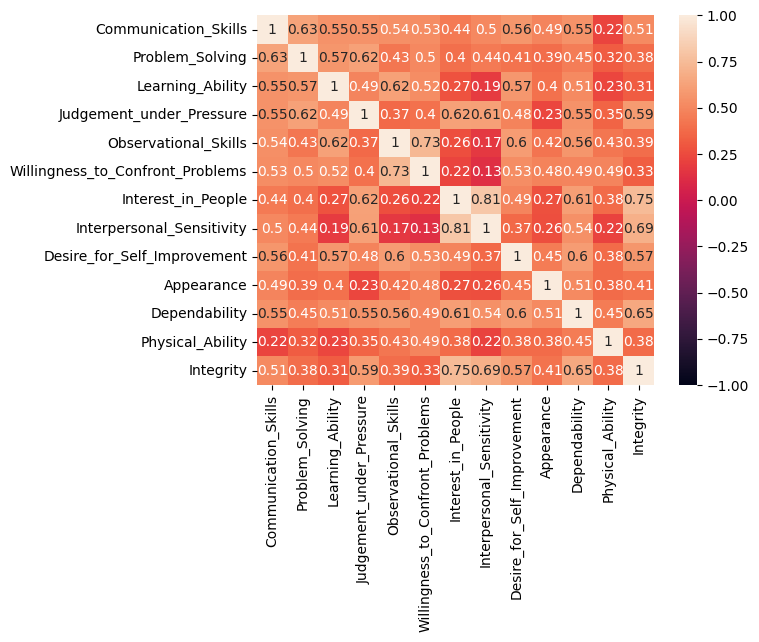

In [5]:
import seaborn as sns

sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)

<Axes: >

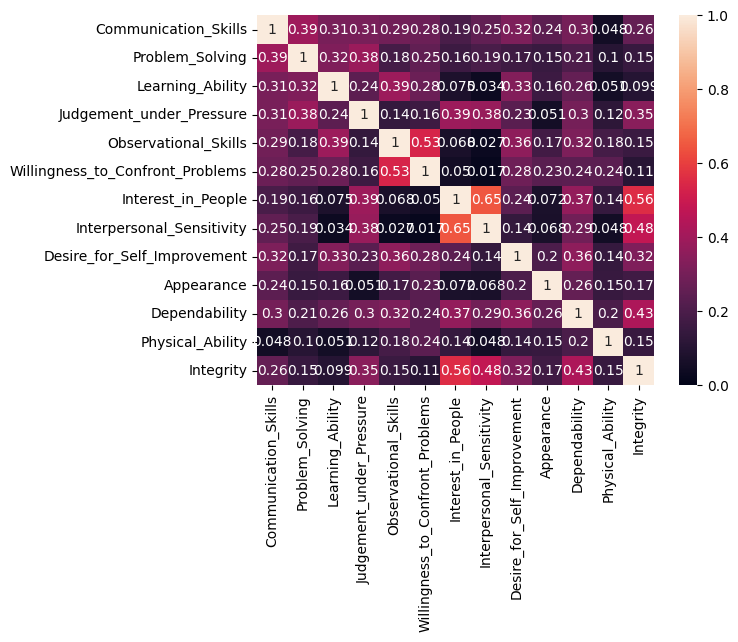

In [6]:
sns.heatmap(correlation**2, annot=True, vmin=0, vmax=+1)

# CAH

Calculate euclidian distance between correlations using $\sqrt{1-Correlation^2}$

In [11]:
D = np.sqrt(1-correlation**2)
print(D.iloc[:3,:3])

                      Communication_Skills  Problem_Solving  Learning_Ability
Communication_Skills              0.000000         0.778185           0.83215
Problem_Solving                   0.778185         0.000000           0.82233
Learning_Ability                  0.832150         0.822330           0.00000


In [12]:
from scipy.spatial.distance import squareform
VD = squareform(D)
print(VD)

[0.77818523 0.83215007 0.83267178 0.84289804 0.85017808 0.89843705
 0.86427518 0.82560814 0.87100447 0.83708488 0.97568158 0.8613188
 0.82233043 0.78499017 0.90359063 0.86517037 0.91772702 0.89810686
 0.91253221 0.92196106 0.89071177 0.94739634 0.92309005 0.87219097
 0.78223456 0.85140174 0.96187211 0.98264578 0.8190852  0.91703795
 0.85960042 0.97392625 0.94935047 0.92770778 0.91635538 0.78250602
 0.78980271 0.87583841 0.97398669 0.83704371 0.93763126 0.80862658
 0.68349431 0.96516709 0.9862157  0.80115068 0.90858111 0.82675831
 0.90407921 0.92057396 0.97474855 0.99163318 0.84754664 0.87591723
 0.87338953 0.87327121 0.94535553 0.59307603 0.87409835 0.96345514
 0.79439041 0.92629042 0.66686892 0.92852812 0.9656013  0.84117373
 0.97590127 0.7219     0.89431316 0.80140227 0.92692439 0.82414385
 0.86080325 0.92416038 0.91048572 0.8949733  0.75680154 0.9245921 ]


In [13]:
from scipy.cluster.hierarchy import ward

cah = ward(VD)
print(cah)

[[ 6.          7.          0.59307603  2.        ]
 [ 4.          5.          0.68349431  2.        ]
 [12.         13.          0.72571077  3.        ]
 [ 0.          1.          0.77818523  2.        ]
 [ 8.         10.          0.80140227  2.        ]
 [ 3.         16.          0.81925402  3.        ]
 [ 2.         17.          0.85193531  3.        ]
 [14.         19.          0.91093491  5.        ]
 [ 9.         11.          0.92416038  2.        ]
 [20.         21.          0.98022744  7.        ]
 [18.         22.          1.03939101 10.        ]
 [15.         23.          1.23922901 13.        ]]


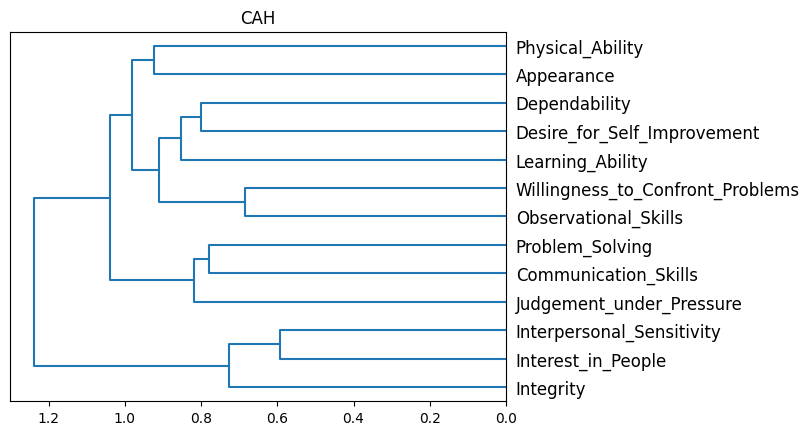

In [15]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.title('CAH')
dendrogram(cah, labels=X.columns, orientation='left', color_threshold=0)
plt.show()

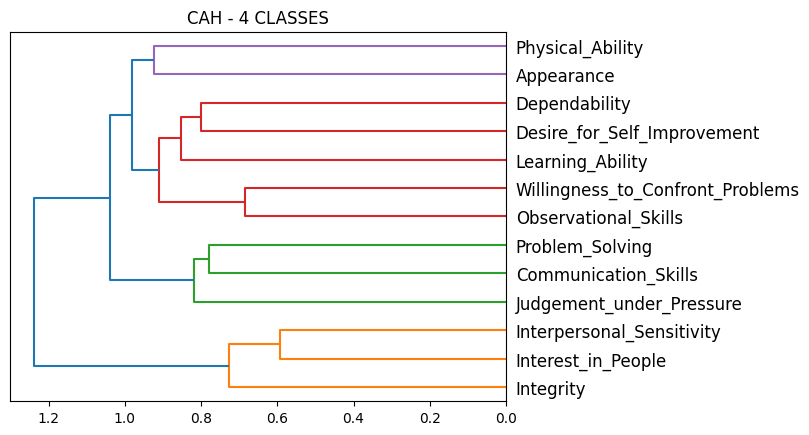

In [16]:
# Separation of classes of CAH
plt.title('CAH - 4 CLASSES')
dendrogram(cah, labels=X.columns, orientation='left', color_threshold=0.95)
plt.show()

In [17]:
## Now with Fcluster function we will create a indicator variable for each class(group) of the CAH

from scipy.cluster.hierarchy import fcluster
groups = fcluster(cah, 4, criterion='maxclust')
print(groups)



[2 2 3 2 3 3 1 1 3 4 3 4 1]


In [18]:
print(np.unique(groups, return_counts=True))

(array([1, 2, 3, 4], dtype=int32), array([3, 3, 5, 2]))


In [19]:
print (X.columns[groups==1])


Index(['Interest_in_People', 'Interpersonal_Sensitivity', 'Integrity'], dtype='object')


In [20]:
for i in np.unique(groups):
    print('Group', i, ':', X.columns[groups==i])


Group 1 : Index(['Interest_in_People', 'Interpersonal_Sensitivity', 'Integrity'], dtype='object')
Group 2 : Index(['Communication_Skills', 'Problem_Solving', 'Judgement_under_Pressure'], dtype='object')
Group 3 : Index(['Learning_Ability', 'Observational_Skills',
       'Willingness_to_Confront_Problems', 'Desire_for_Self_Improvement',
       'Dependability'],
      dtype='object')
Group 4 : Index(['Appearance', 'Physical_Ability'], dtype='object')


In [25]:
#Correlation of active variables agains suplementary variable Overall_Rating
print(X.corrwith(jobrate_df.Overall_Rating).sort_values(ascending=False))

Dependability                       0.769633
Communication_Skills                0.680250
Integrity                           0.671647
Desire_for_Self_Improvement         0.667191
Judgement_under_Pressure            0.655048
Interest_in_People                  0.613343
Learning_Ability                    0.592385
Willingness_to_Confront_Problems    0.589032
Observational_Skills                0.584425
Problem_Solving                     0.577254
Interpersonal_Sensitivity           0.577246
Appearance                          0.568722
Physical_Ability                    0.438495
dtype: float64


In [33]:
X[X.columns[groups==1]].head()

,Interest_in_People,Interpersonal_Sensitivity,Integrity
0,5,3,6
1,7,6,6
2,6,3,7
3,7,7,9
4,9,8,8


In [45]:
# Mean of squares of correlation of each group with Overall_Rating
# Higher the value, higher the correlation
for i in np.unique(groups):
    print('Group', i, ':', np.mean(X[X.columns[groups==i]].corrwith(jobrate_df.Overall_Rating).sort_values(ascending=False))**2)
    print('-'*11)

Group 1 : 0.3853248805210567
-----------
Group 2 : 0.4064282134155022
-----------
Group 3 : 0.4102827963241502
-----------
Group 4 : 0.25362187111487805
-----------
